In [1]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])


In [3]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')



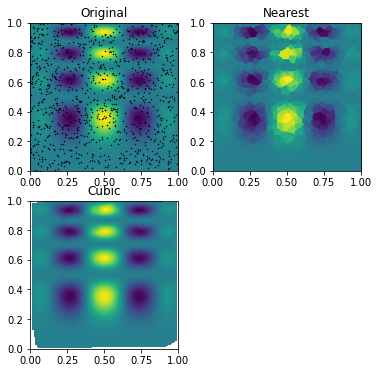

In [4]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)
plt.show()